In [1]:
# Author: Dr Renju Mathew

**Description:** 

This notebook performs a multinomial Logistic Regression to predict the type of tumour (liver or lung or pancreas) based on the size of the tumour.

The dataset is a dummy dataset created within the notebook. Percentage noise can be set.  

A confusion matrix is displayed.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LinearRegression

# Print location of matplotlibrc file
#import matplotlib
#print(matplotlib.matplotlib_fname())

In [3]:
def logistic_regression_equation(beta0, beta1, X):
  y = beta0 + beta1*X 
  probability = 1 / (1 + np.exp(-y))
  return probability

In [4]:
# Create a dummy dataset of tumour sizes and whether they are malignant or not
size_range = [1, 1000]
no_of_samples = 100_000
sizes = np.random.randint(size_range[0], size_range[1], no_of_samples)/10
tumours = pd.DataFrame(sizes, columns=['Tumour size (mm)'])
# Create a column "Tumour type"
# Size < 33 mm is Liver (-1), 
# size >= 66 mm is Lung (+1),
# size >= 33 mm and < 66 mm is Pancreas (0)
#tumours['Tumour type'] = tumours['Tumour size (mm)'].apply(lambda x: '-1' if x < 33 else ('+1' if x >= 66 else '0'))
tumours['Tumour type'] = tumours['Tumour size (mm)'].apply(lambda x: 'liver' if x < 33 else ('lung' if x >= 66 else 'pancreas'))

In [5]:
tumours.head()

,Tumour size (mm),Tumour type
0,38.4,pancreas
1,73.8,lung
2,48.9,pancreas
3,40.8,pancreas
4,44.6,pancreas


In [6]:
noise = True
percentage_of_tumours_to_change = 0.1

In [7]:
# If the above is True, add noise to the data 
if noise:
    # Randomly change some values 
    np.random.seed(42)
    tumours.loc[np.random.choice(tumours.index, int(len(tumours)*percentage_of_tumours_to_change), replace=False), 'Tumour type'] = 'lung'
    tumours.loc[np.random.choice(tumours.index, int(len(tumours)*percentage_of_tumours_to_change), replace=False), 'Tumour type'] = 'liver'
    tumours.loc[np.random.choice(tumours.index, int(len(tumours)*percentage_of_tumours_to_change), replace=False), 'Tumour type'] = 'pancreas'

In [8]:
# Plot the data
X = tumours['Tumour size (mm)'].values
y = tumours['Tumour type'].values

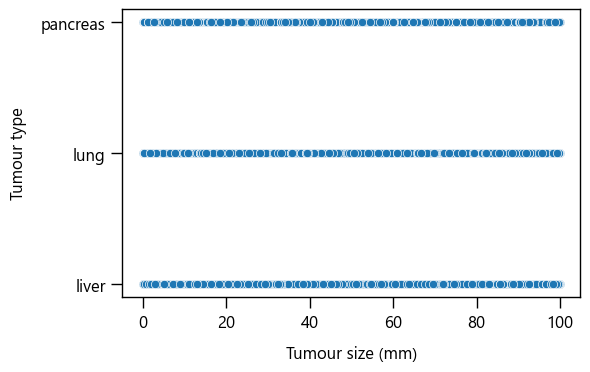

In [9]:
sns.scatterplot(x='Tumour size (mm)', y='Tumour type', data=tumours)
plt.show()

In [10]:
# Perform Logistic Regression

# Use sklearn's train_test_split to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2)

# Use sklearn's LogisticRegression to fit a model to the training data
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_preds = clf.predict(X_test)

# Use sklearn's confusion_matrix to evaluate the model's predictions
from sklearn.metrics import confusion_matrix

the_confusion_matrix = confusion_matrix(y_test, y_preds)
#print('Confusion matrix:')
#print(the_confusion_matrix)

# Print the model's accuracy
print(f'Accuracy: {clf.score(X_test, y_test)}')

Accuracy: 0.78355


In [11]:
print(clf.predict([[32]]))
print(clf.predict([[33]]))
print(clf.predict([[65]]))
print(clf.predict([[66]]))
print(clf.predict([[67]]))

['liver']
['liver']
['lung']
['lung']
['lung']


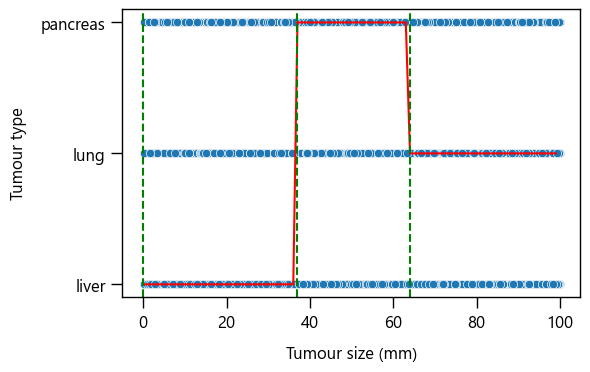

In [12]:
X_range = np.arange(0, 100, 1)
predictions = clf.predict(X_range.reshape(-1, 1))
# Determine the index of the first 'lung' prediction
lung_index = np.where(predictions == 'lung')[0][0]
# Determine the index of the first 'pancreas' prediction
pancreas_index = np.where(predictions == 'pancreas')[0][0]
# Determine the index of the first 'liver' prediction
liver_index = np.where(predictions == 'liver')[0][0]

# Plot the data
sns.scatterplot(x='Tumour size (mm)', y='Tumour type', data=tumours)
plt.plot(X_range, predictions, color='red')
plt.axvline(X_range[lung_index], color='green', linestyle='--')
plt.axvline(X_range[pancreas_index], color='green', linestyle='--')
plt.axvline(X_range[liver_index], color='green', linestyle='--')
plt.show()

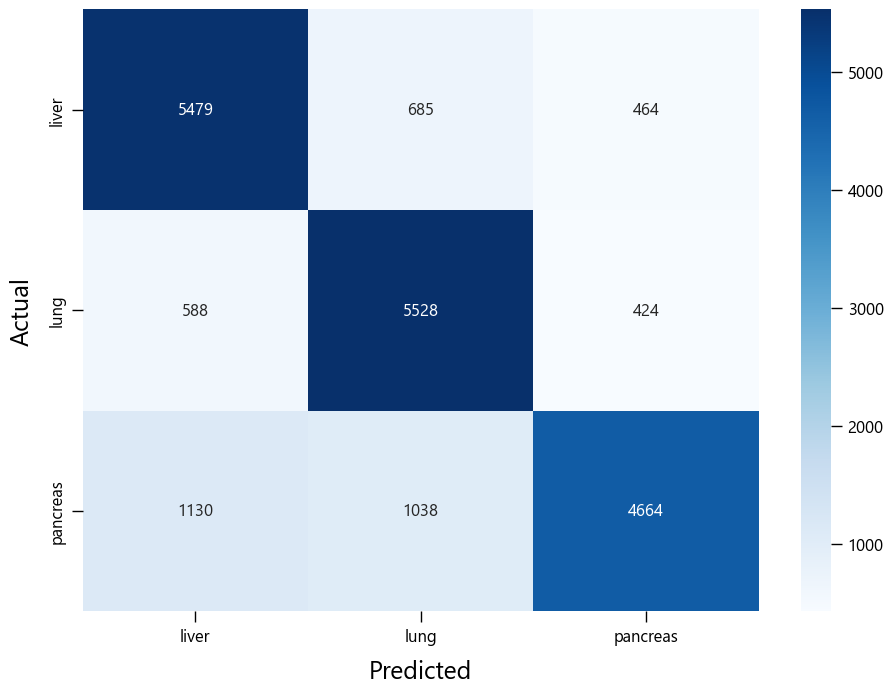

In [13]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in ['liver', 'lung', 'pancreas']],

columns = [i for i in ['liver', 'lung', 'pancreas']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.show()

In [14]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       liver       0.76      0.83      0.79      6628
        lung       0.76      0.85      0.80      6540
    pancreas       0.84      0.68      0.75      6832

    accuracy                           0.78     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.79      0.78      0.78     20000



In [15]:
# Note: this implementation is restricted to the binary classification task.
# from sklearn.metrics import roc_curve, roc_auc_score

# # Find the probabilities for each data point
# y_pred_proba = clf.predict_proba(X_train)[::,1]

# # Find the false positive rate, true positive rate and threshold
# fpr, tpr, threshold = roc_curve(y_train, y_pred_proba)

# # Find the area under the curve
# auc = roc_auc_score(y_train, y_pred_proba)

# # Plot the ROC curve
# plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()